Nolan Roth <br>
PHYS 434 

# Lab #5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
import pickle

plt.rcParams["figure.figsize"] = (15, 10)

The basic function of the LHC is to collide protons at high velocities. Proton-proton collisions at the velocities present in the LHC provide the high-energy environment for production of many rare particles in the standard model (SM), and presents the possibility of observing particles beyond the standard model (BSM). The SM is unsatisfactory to explain a number of phenomena, including dark matter and dark energy. In any case, a BSM is needed, and it is expected to couple with the SM in a way that should allow us to observe BSM particles at the LHC. 

The proton-proton collisions at the LHC are designed to allow us to observe and record data about the many particles that are sponateously created and decay during the collisions between protons. There are around 1 billion collision events per second at the LHC, most of which are uninteresting. What we are primarily concerned with are 'hard' collisions of proton consituents, i.e. head on collisions between quarks or gluons, where high-energy particles are produced.

We can only observe the final state particles that are created from a collision, but the probability of different final state particles being created can be determined from the standard model. If certain particles combinations are being generated at a much higher rate than is expected from the standard model, we can expect that there is a flaw in our understanding and attempt to find a BSM theory to explain our findings. The data from the LHC can also be used to test a BSM theory to see if the expected probability of final state particle combinations from the theory matches what is observed from the collisions. 

The Atlas detector at the LHC has several types of sensors used to capture large amounts of information about these collisions. From the data, our goal is to 'reconstruct' what the final state particles were from our collisions. The detector has four main segments, the tracking chamber, EM calorimeter, Hadronic calorimeter, and Muon chamber, each of which is designed to capture and record data about different types of particles from the collisions. The calorimeters are designed to 'absorb' particles, in a way that causes them to decay in a chain of different particles. The resulting particles can then be measured and used to determine what the original particle was that entered the chamber, which is considered the final state particle of interest of the collision.

An interesting phenomenon that occurs as a result of hard collisions is 'jets', which occur when a single quark or gluon radiates more gluons, which radiate more gluons in a repeating decay process until hadronization occurs. This is when the quarks and gluons become bound to hadrons, which are finally measured in the calorimeters. Because the original quark or gluon is considered the final state particle of our collision, we need to reconstruct the original quark or gluon from the jet particles that are recorded by the calorimeter. This is a very difficult process and algorithms are used to reconstruct the original particle form the deposited jet.

A number of different variables are recorded from the jets that can be used to determine properties of the final state particle. Analyzing jet mass, four-momenta, angular information, and substructure information can lead us to determine which particles were present after the proton-proton collision. Jets are loosely defined, with the most general definition being a group of particles moving in the same direction. What is considered a jet is determined by the algorithm being used. There are 14 different high-level variables in our data that describe the features of the jets recorded in a calorimeter. These are:

'pt': $p_t$, the transverse momentum <br>
'eta': $\eta$, the psuedorapidity, angle of a particle relative to the beam axis, $\eta$ = -ln[tan($\theta$/2] <br>
'phi': $\phi$, azimuthal angle around the beam <br>
'mass': mass in GeV <br>
'ee2': 2 point energy correlation function (ECF) <br>
'ee3': 3 point energy correlation function <br>
'd2': ratio, ee2/(ee3)^3 <br>
'angularity': $a_3$ <br>
't1': 1 subjettiness <br>
't2': 2 subjettiness <br>
't3': 3 subjettiness <br>
't21': t2/t1, ratio of 2 subjettiness to 1 subjettiness <br>
't32': t3/t2, ratio of 3 subjettiness to 2 subjettiness <br>
'KtDeltaR': $k_t$$\Delta$R, $\Delta$R of two subjets within a large-R jet  <br>

We are given sample data from a Higgs decay, which is considered our signal, and sample data predicted by other QCD processes, which is considered our background.

In [2]:
infile = open ('higgs_250_500.pkl','rb')
higgs_data = pickle.load(infile)
infile = open ('qcd_250_500.pkl', 'rb')
qcd_data = pickle.load(infile)

Examining the keys, which are the variables describing the jets:

In [3]:
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
qcd_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [8]:
for i in range(10):
 print(higgs_data['mass'][i],qcd_data['phi'][i])

125.15036485403486 1.803006728781795
130.55267214662751 0.18881744125909125
125.70306309880351 -2.3266463449656514
126.21585336608149 -1.1241758153223422
132.18250371689544 1.9667943025710881
125.67653506886116 -1.6489548022848703
127.65400794990293 2.464253288529526
124.16656852260293 0.4183868168517043
122.13035265114684 -2.830589033548139
125.19144633816678 0.9534881944716028


We want to determine how to discriminate between our signal and background. Plotting histograms of each variable for both the Higgs signal and the QCD background:

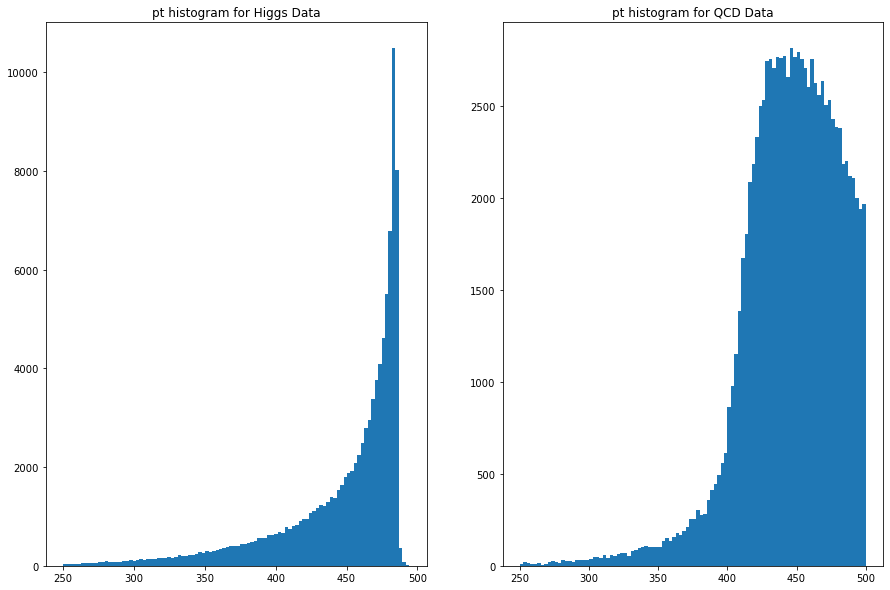

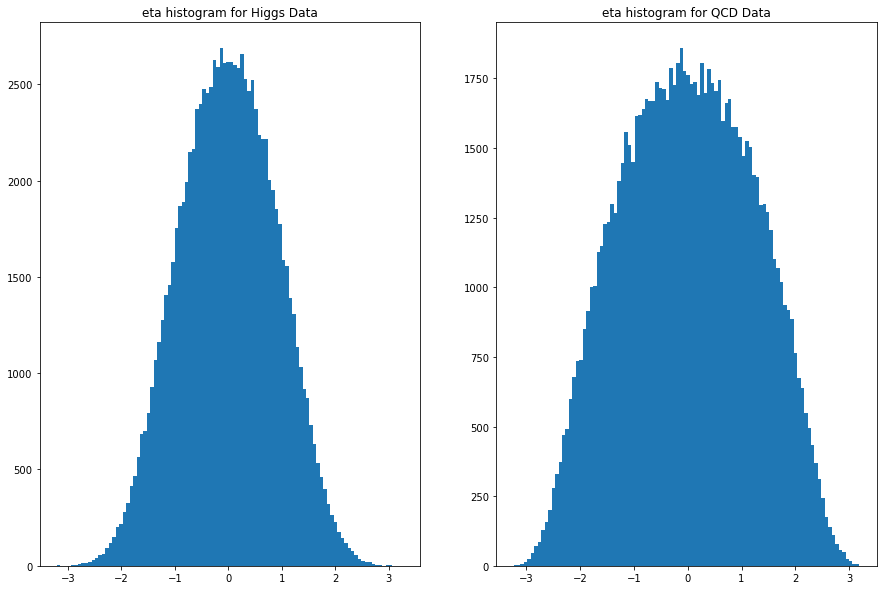

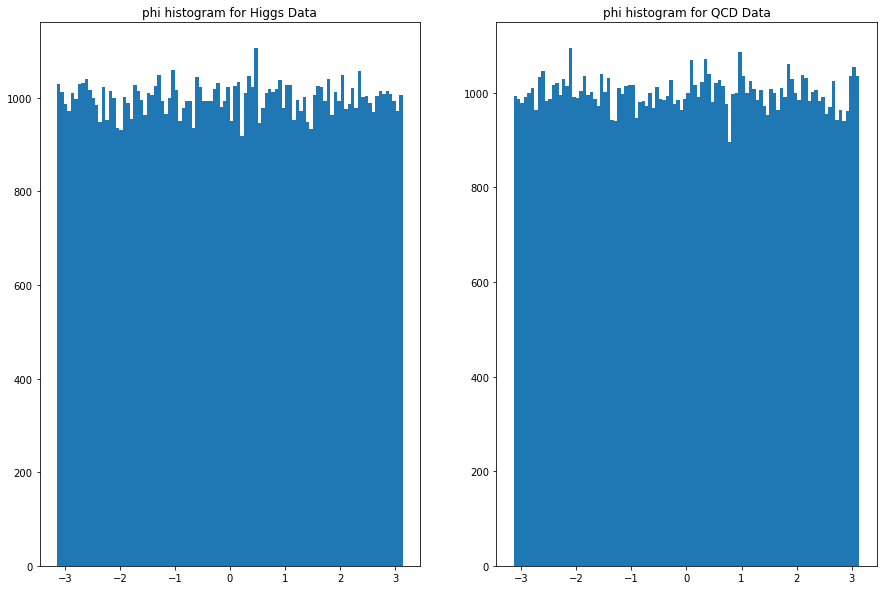

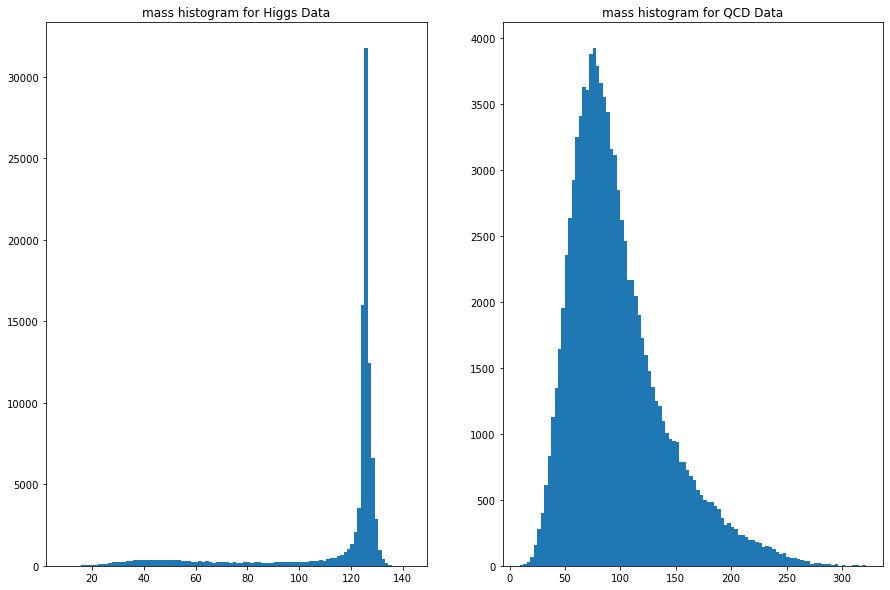

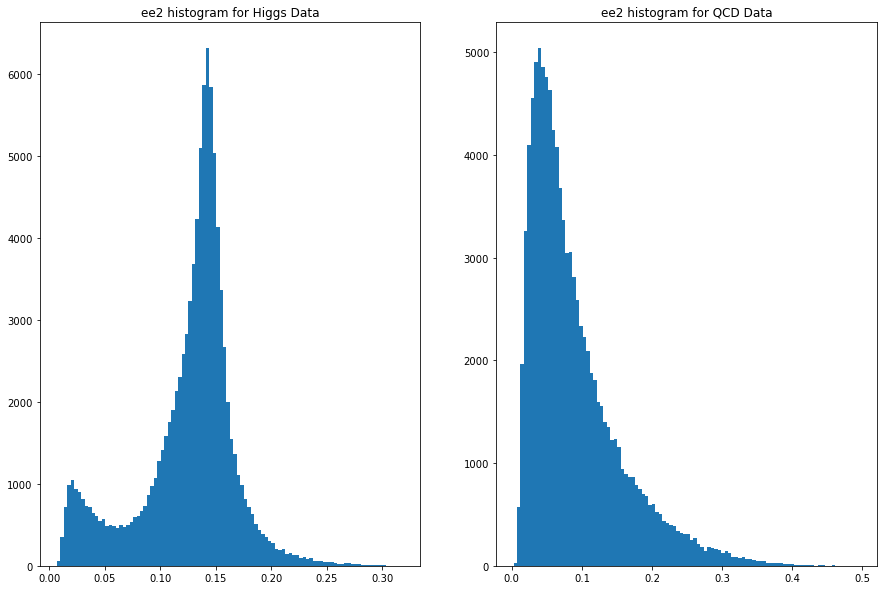

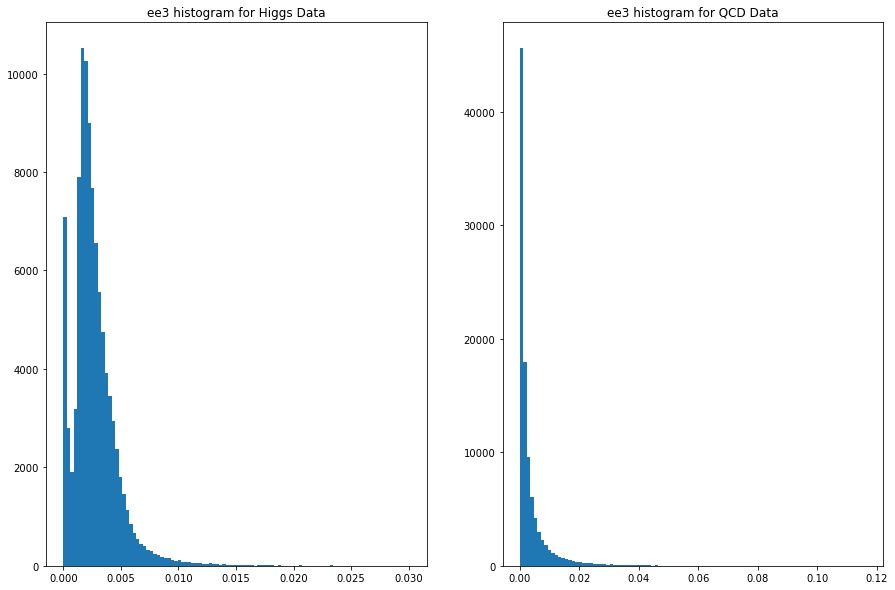

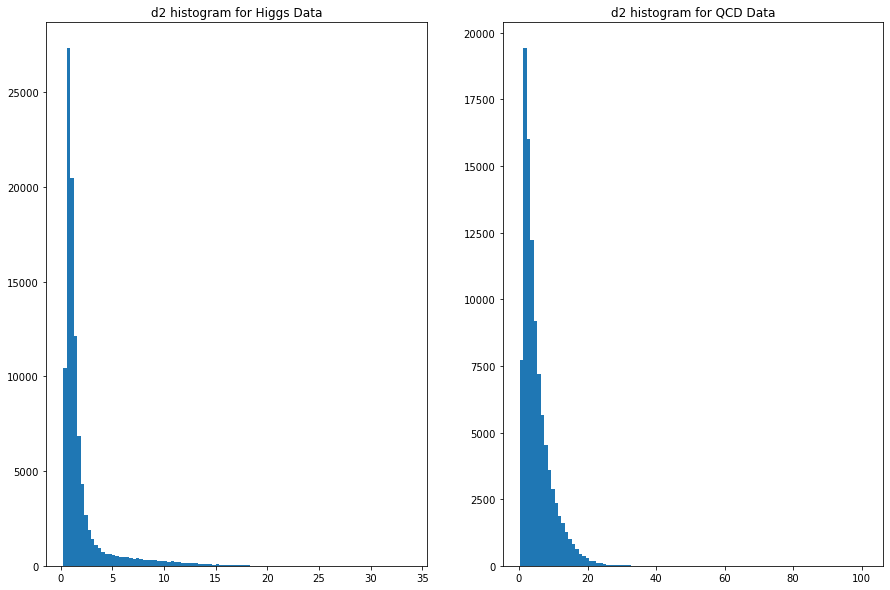

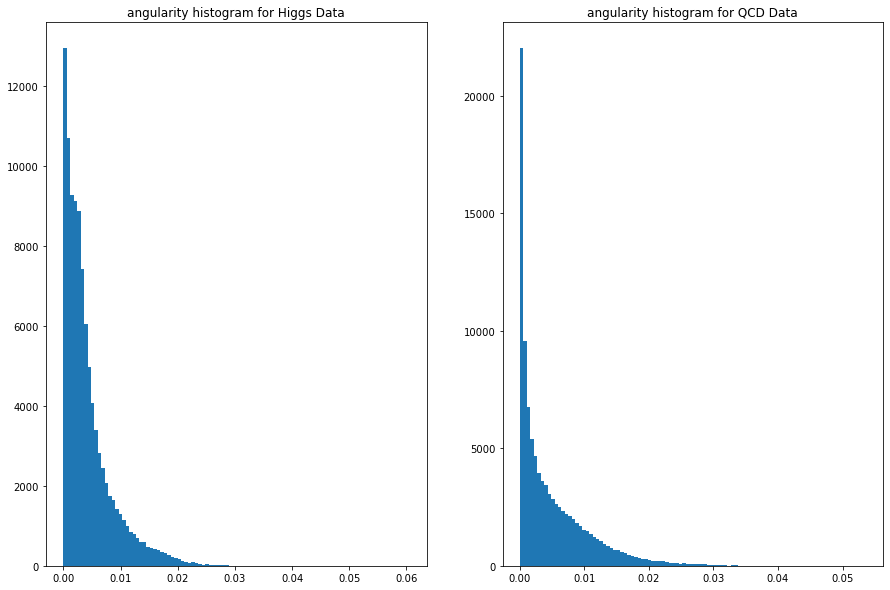

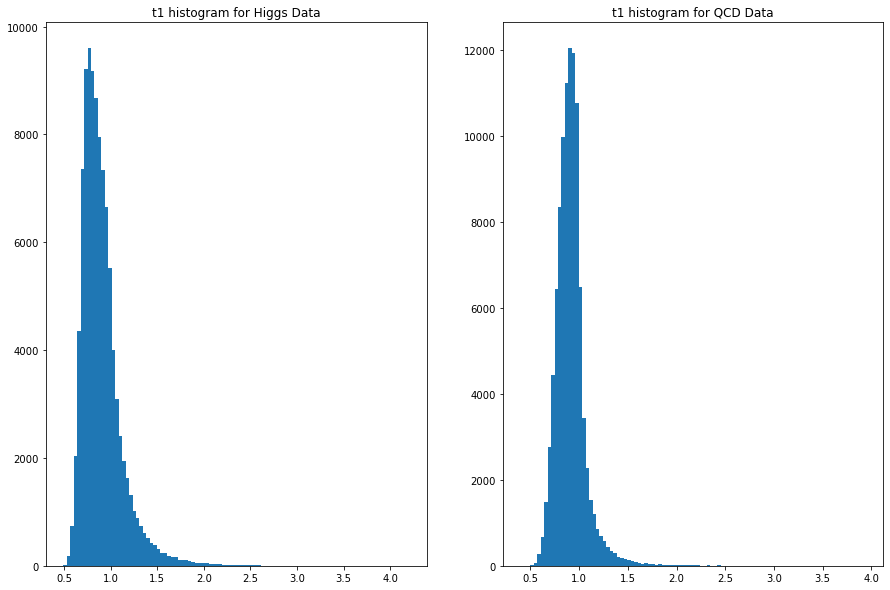

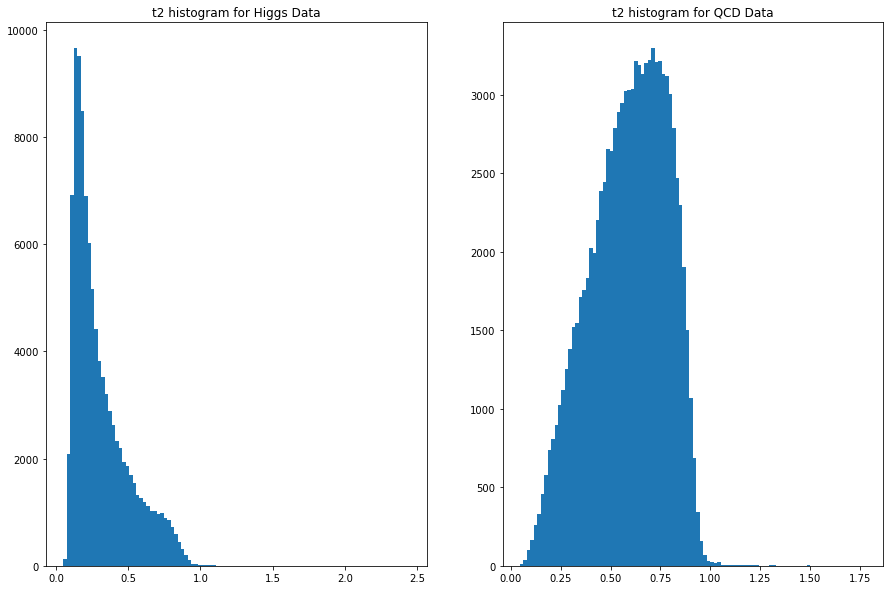

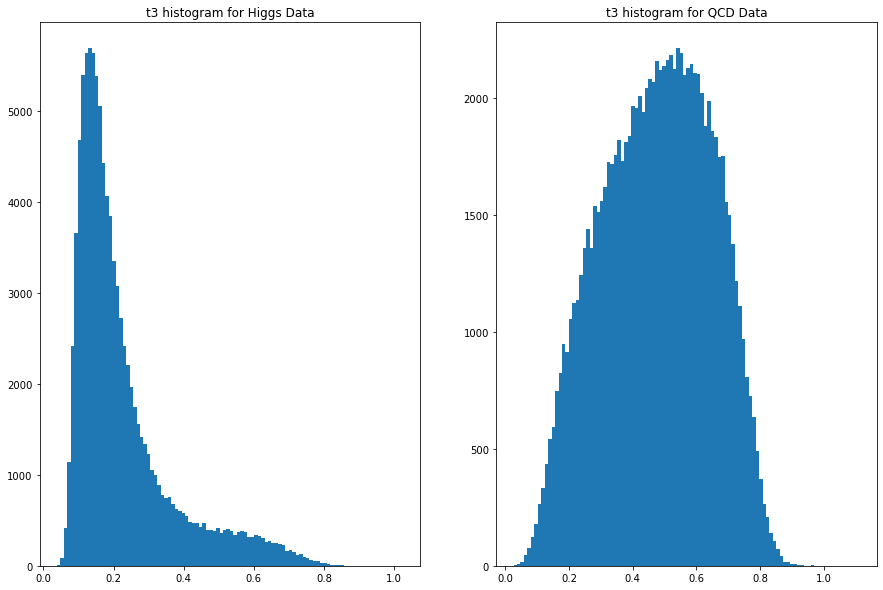

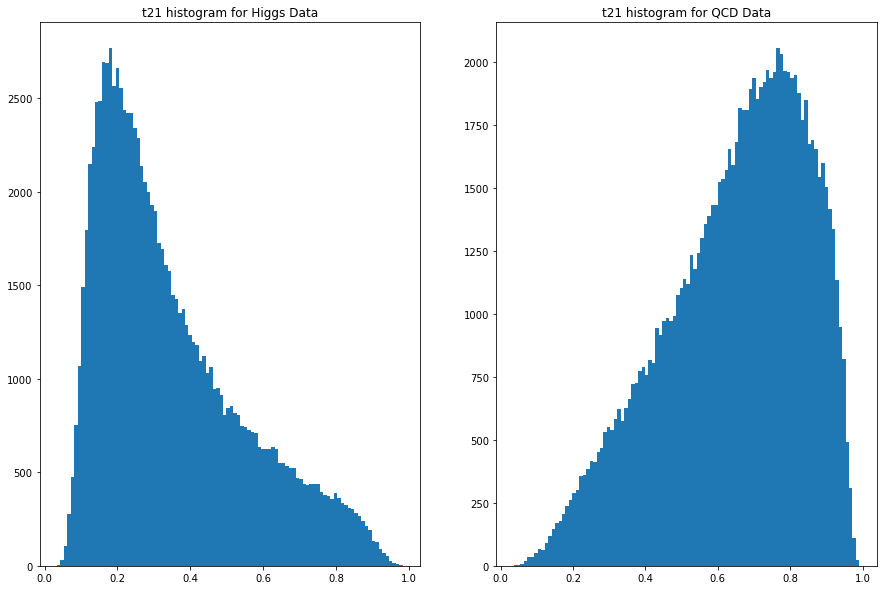

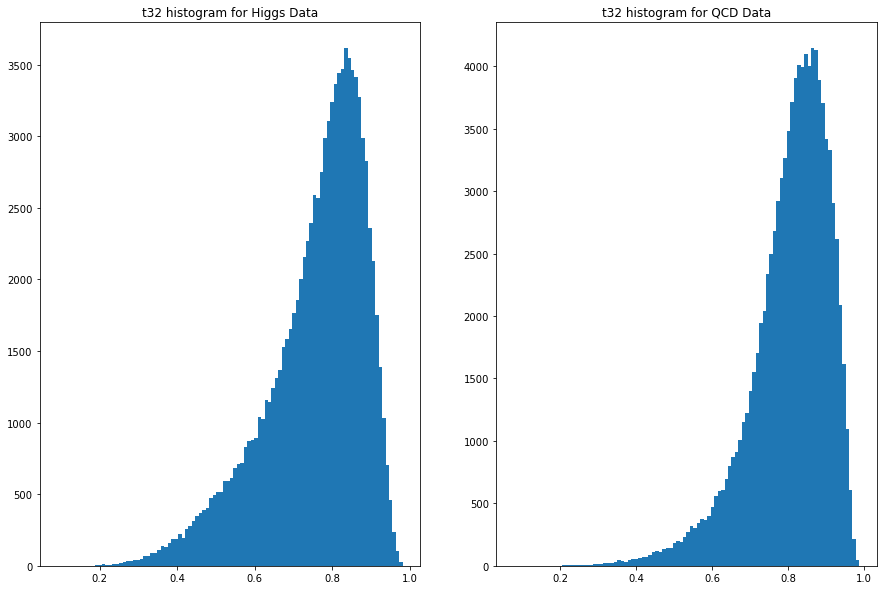

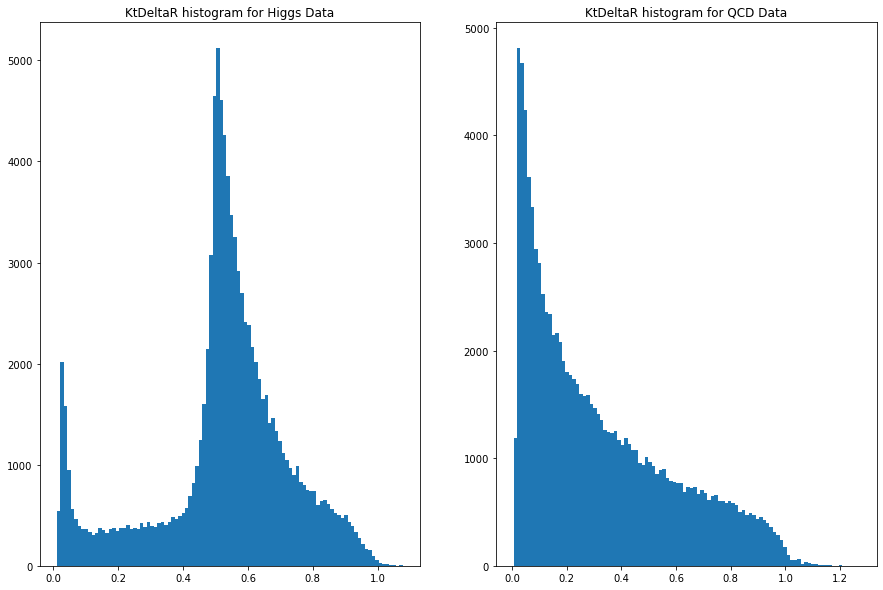

In [7]:
for key in higgs_data.keys():
    fig, (ax1, ax2) = plt.subplots(1,2)
    y1 = higgs_data[key]
    y2 = qcd_data[key]
    ax1.hist(y1, 100)
    ax2.hist(y2, 100)
    ax1.set_title(str(key) + ' histogram for Higgs Data')
    ax2.set_title(str(key) + ' histogram for QCD Data')
    plt.show()

These plots indicate the distribution of each variable for both the Higgs data and the QCD background. We want to find plots with distinct differences that will allow us discriminate between our Higgs data and background.

Comparing the histogram of mass from the Higgs vs QCD data, we can see a large difference in the distribution. The Higgs data has a large spike at 125 GeV that is not present in the QCD mass distribution. This makes sense as the mass of the Higgs boson is approximately 125 GeV.

The phi histograms do not provide much useful information, as the distribution of phi values is relatively flat for both the Higgs data and QCD data.

The majority of the other histograms are slightly different, but not different enough alone to distinguish between a background and signal data point. Multiple variables would need to be used to in order to distinguish between background and signal.